1/1 [==============================] - 0s 474ms/step
The model predicts this image as: Apple___healthy


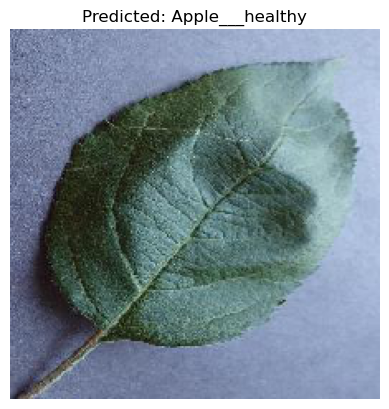

In [4]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model('plant_disease_vgg16_model.h5')

# Load class indices
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)
class_labels = {v: k for k, v in class_indices.items()}  # Invert the class indices

# Directory of a sample image for prediction
image_path = r'C:\Users\user\OneDrive\Documents\python programs\jupyter\projects\plant dataset\valid\Apple___healthy\b9a7faa2-e43b-4d8d-8df0-2256c8ee3607___RS_HL 7483.JPG'  # Replace with the path of your image
  # Replace with the path of your image

# Image preprocessing
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Load image
    img_array = img_to_array(img) / 255.0               # Convert to array and normalize
    img_array = np.expand_dims(img_array, axis=0)       # Expand dimensions to match model input shape
    return img, img_array

# Predict the class of a single image
def predict_image_class(image_path):
    img, img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    return img, class_labels[predicted_class]

# Output the prediction and display the image
img, predicted_class = predict_image_class(image_path)
print(f"The model predicts this image as: {predicted_class}")

# Display the image with the predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
